In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-wisconsin-data/data.csv


In [2]:
import pandas as pd
pd.set_option('use_inf_as_na', True)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import itertools
from fractions import Fraction
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as acs
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import f1_score,classification_report
from sklearn.metrics import log_loss
from sklearn.utils import resample
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv("/kaggle/input/breast-cancer-wisconsin-data/data.csv")
data.drop(["Unnamed: 32"],axis=1,inplace=True)
display(data.head())

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
#New data with "M"=1 and "B"=0
data1=data.copy()
def classifier(data1):
    if data1["diagnosis"]=="M":
        return "1"
    else:
        return "0"
data1["diagnosis"] = data1.apply(classifier, axis=1)
data1.replace([np.inf, -np.inf], np.nan, inplace=True)
data1["diagnosis"]=pd.to_numeric(data1["diagnosis"],errors="coerce")

# __Data Preprocessing__ 

In [5]:
print(data1.columns,data.shape)
# print(data1.info())
# print(data1.describe().T)
# print(data1.nunique())

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object') (569, 32)


B    357
M    212
Name: diagnosis, dtype: int64


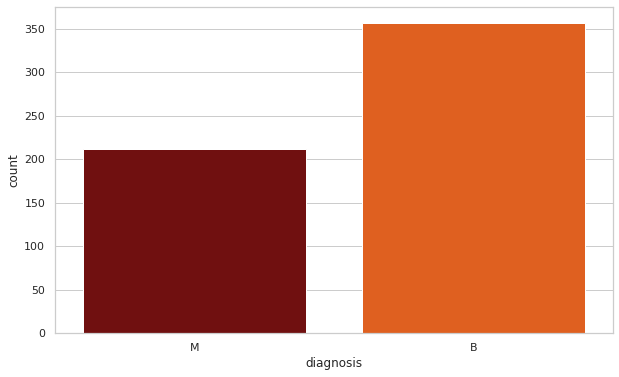

In [6]:
sns.set(style="whitegrid")
print(data['diagnosis'].value_counts())
fig = plt.figure(figsize = (10,6))
sns.countplot('diagnosis', data=data, palette='gist_heat')
plt.show()

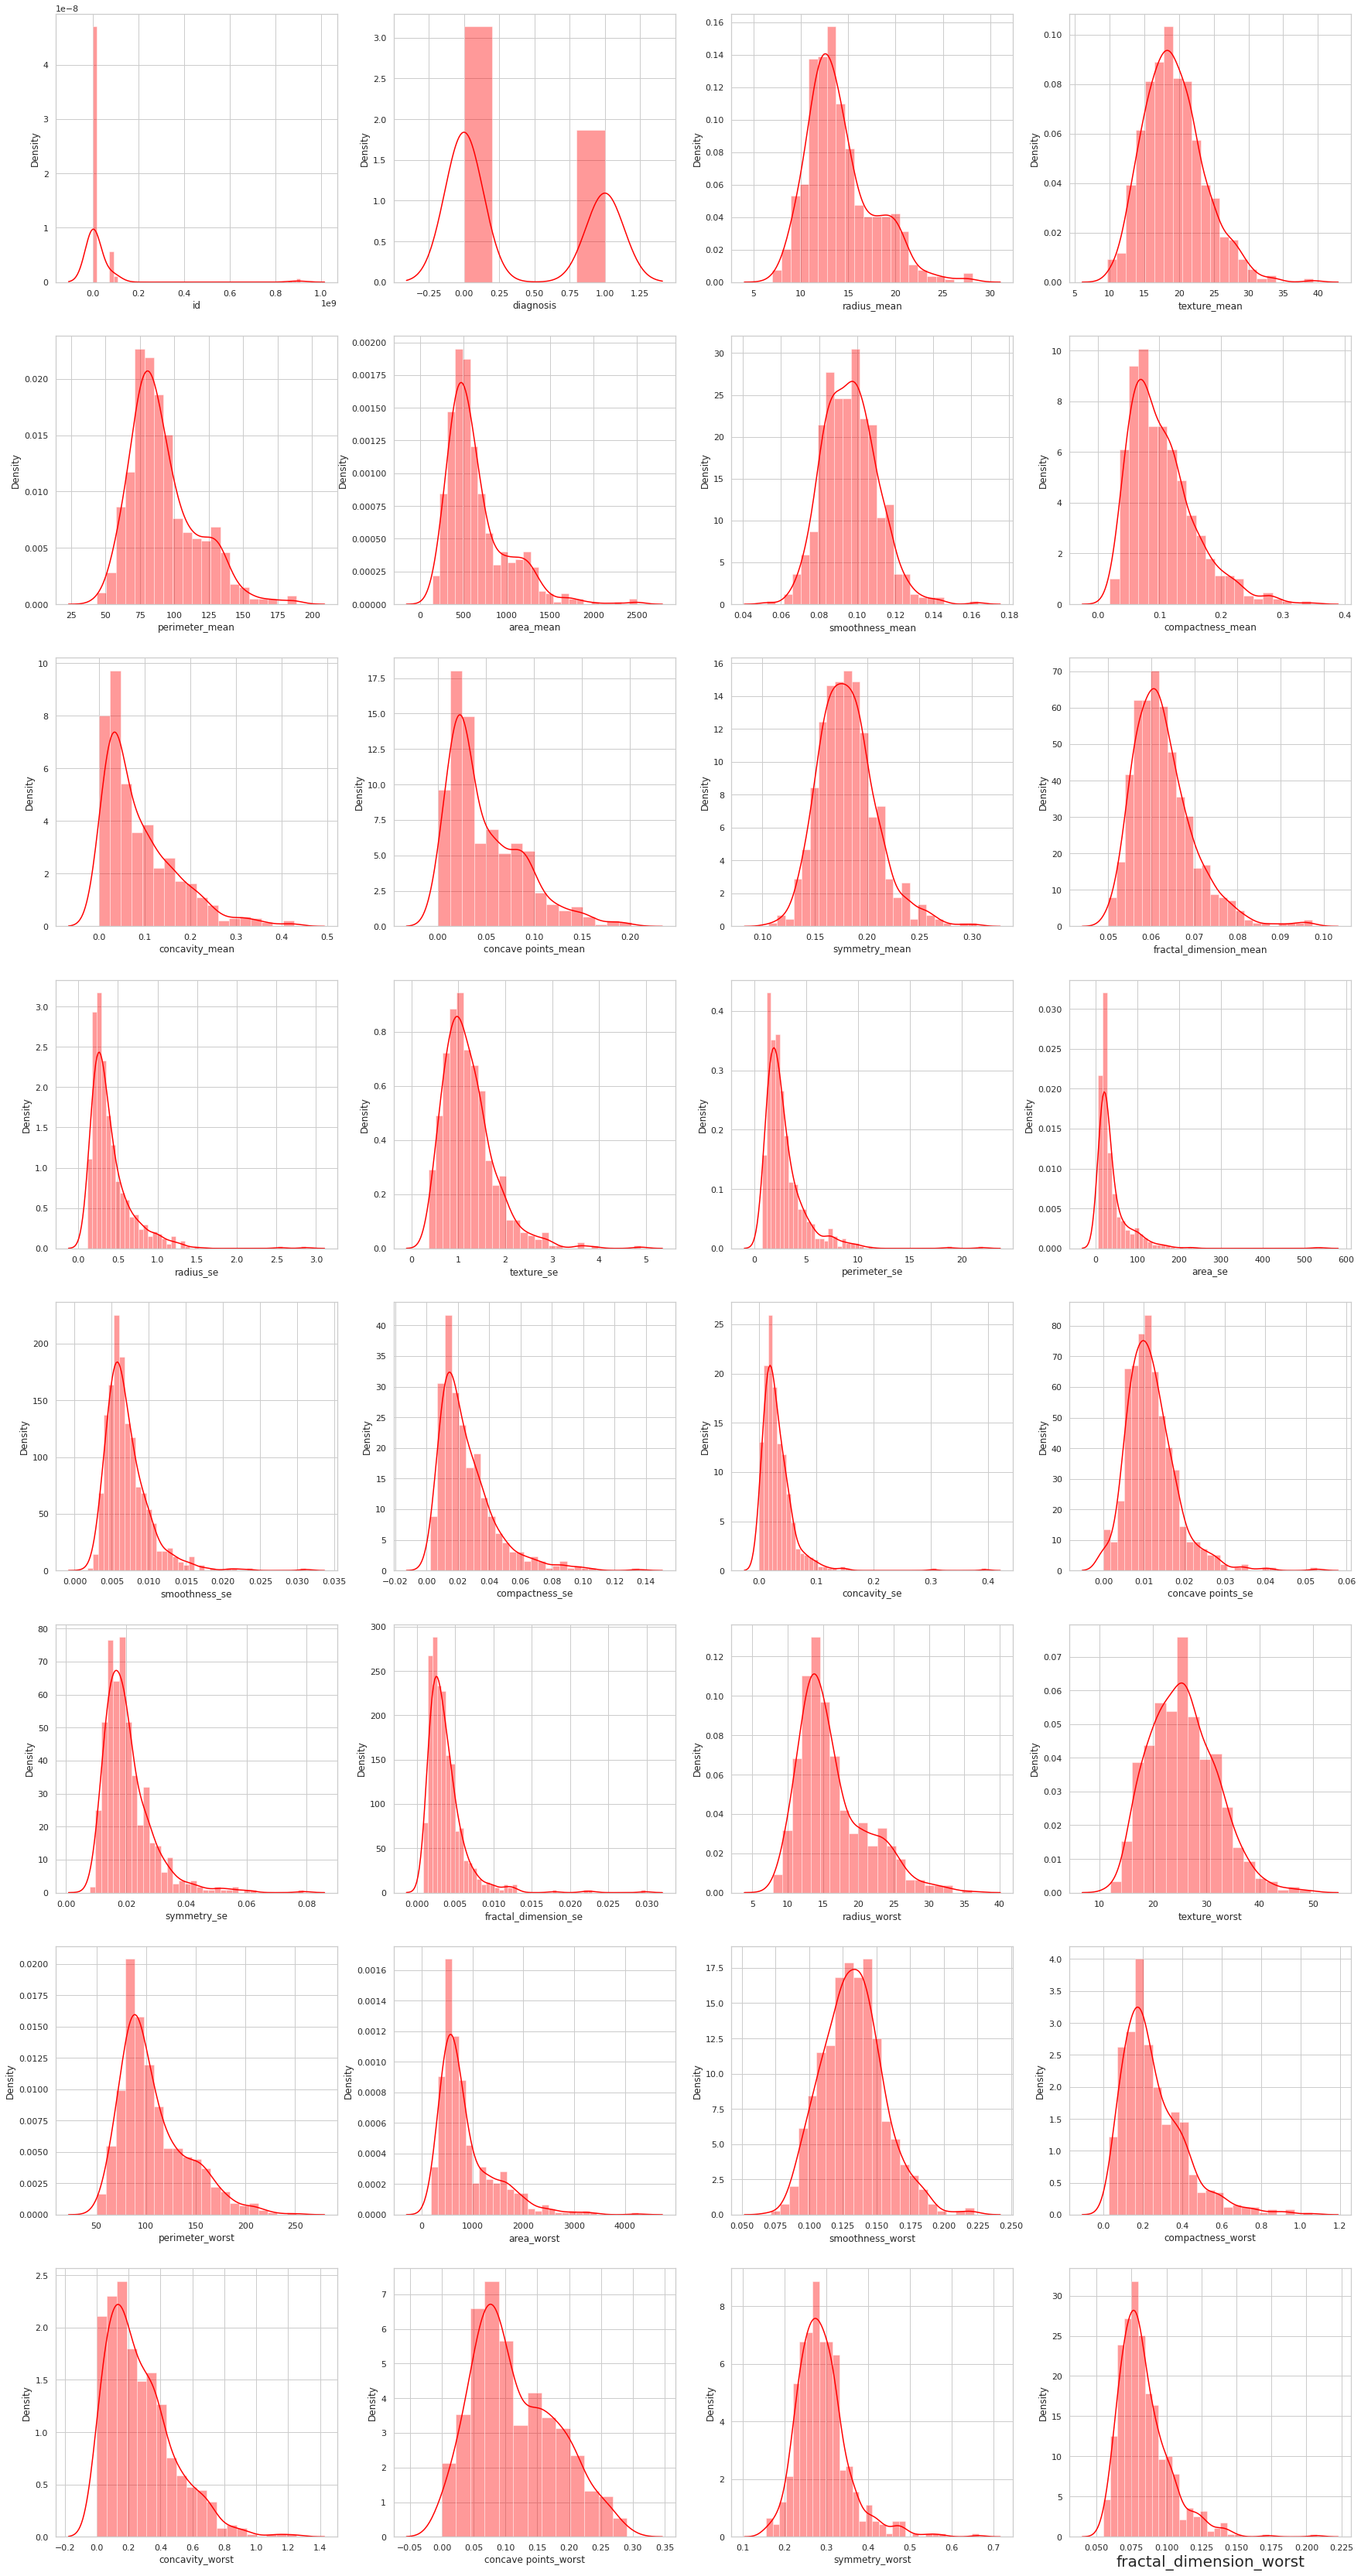

In [7]:
color = sns.color_palette("pastel")

fig, ax1 = plt.subplots(8,4, figsize=(30,60))
k = 0
columns = list(data1.columns)
for i in range(8):
    for j in range(4):
            sns.distplot(data1[columns[k]], ax = ax1[i][j], color = 'red')
            plt.xlabel(columns[k],size=20)
            k += 1
plt.show()

In [8]:
#Log transform
def log_transform(col):
    return np.log(col[0])

data1["compactness_mean"]=data1[["compactness_mean"]].apply(log_transform, axis=1)
data1["concavity_mean"]=data1[["concavity_mean"]].apply(log_transform, axis=1)
data1["concave points_mean"]=data1[["concave points_mean"]].apply(log_transform, axis=1)
data1["radius_se"]=data1[["radius_se"]].apply(log_transform, axis=1)
data1["perimeter_se"]=data1[["perimeter_se"]].apply(log_transform, axis=1)
data1["smoothness_se"]=data1[["smoothness_se"]].apply(log_transform, axis=1)
data1["compactness_se"]=data1[["compactness_se"]].apply(log_transform, axis=1)
data1["concavity_se"]=data1[["concavity_se"]].apply(log_transform, axis=1)
data1["symmetry_se"]=data1[["symmetry_se"]].apply(log_transform, axis=1)
data1["fractal_dimension_se"]=data1[["fractal_dimension_se"]].apply(log_transform, axis=1)
data1["area_worst"]=data1[["area_worst"]].apply(log_transform, axis=1)
data1["compactness_worst"]=data1[["compactness_worst"]].apply(log_transform, axis=1)
data1["concavity_worst"]=data1[["concavity_worst"]].apply(log_transform, axis=1)

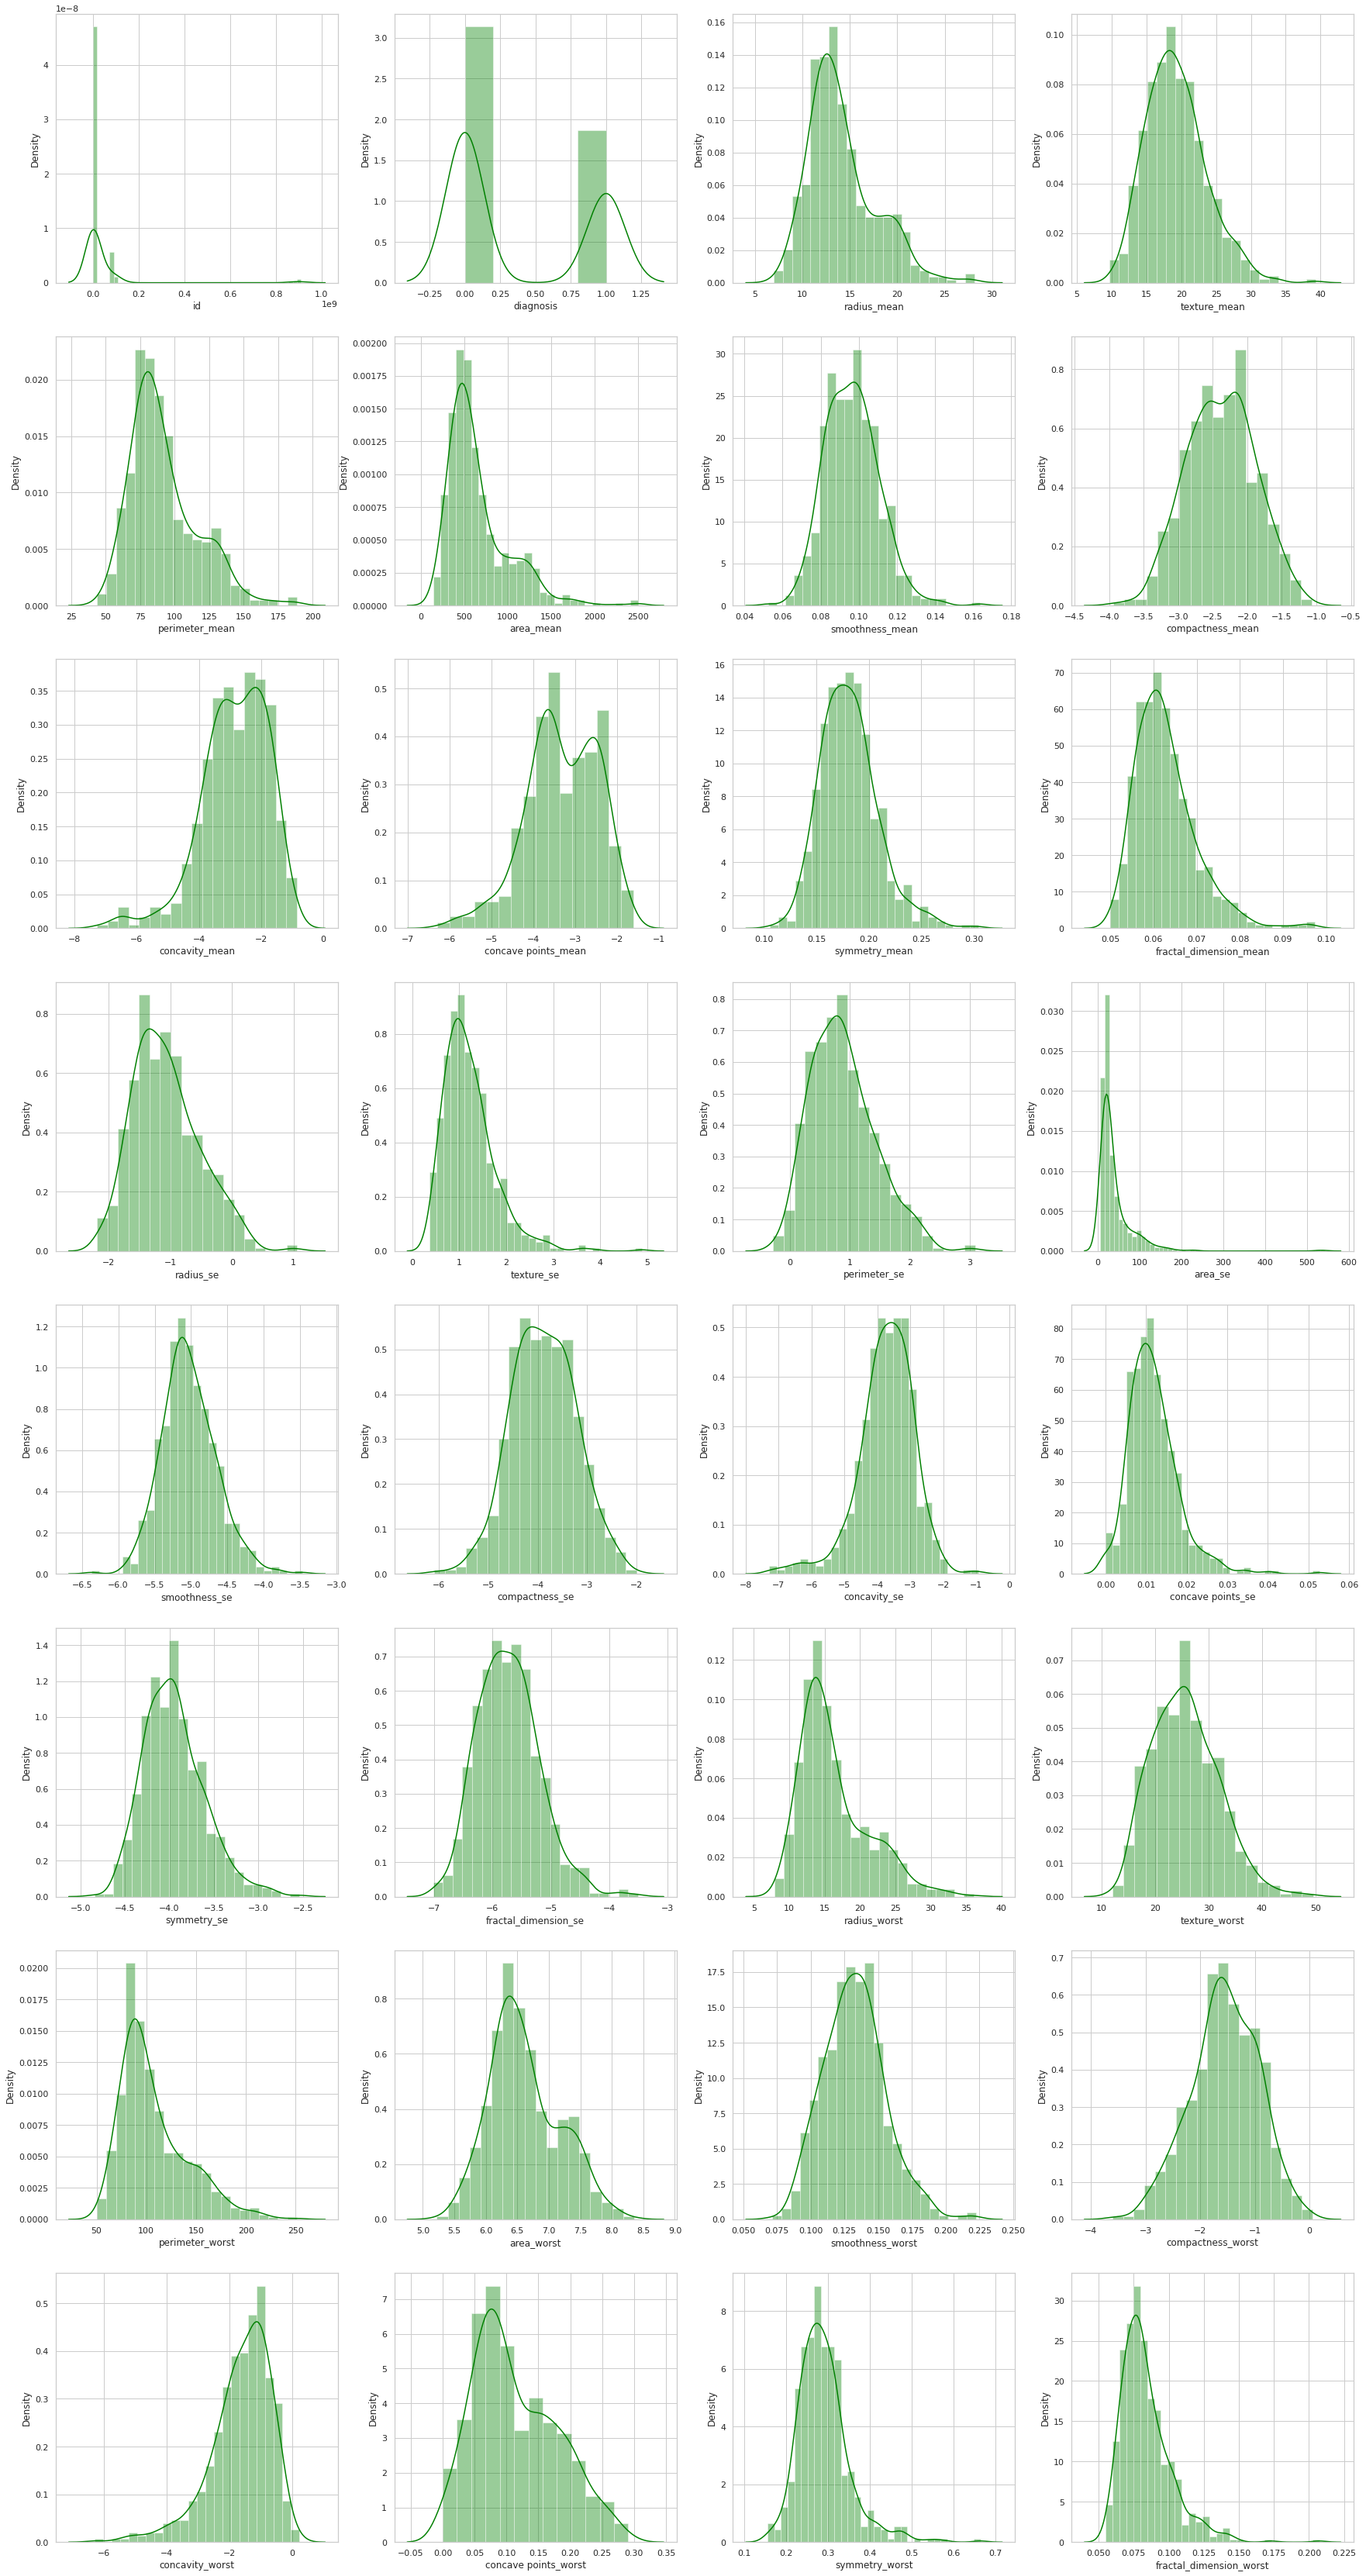

In [9]:
color = sns.color_palette("pastel")

fig, ax1 = plt.subplots(8,4, figsize=(30,60))
k = 0
columns = list(data1.columns)
for i in range(8):
    for j in range(4):
        sns.distplot(data1[columns[k]], ax = ax1[i][j], color = 'green')
        k += 1
plt.show()

**Correlation plot between the features:**

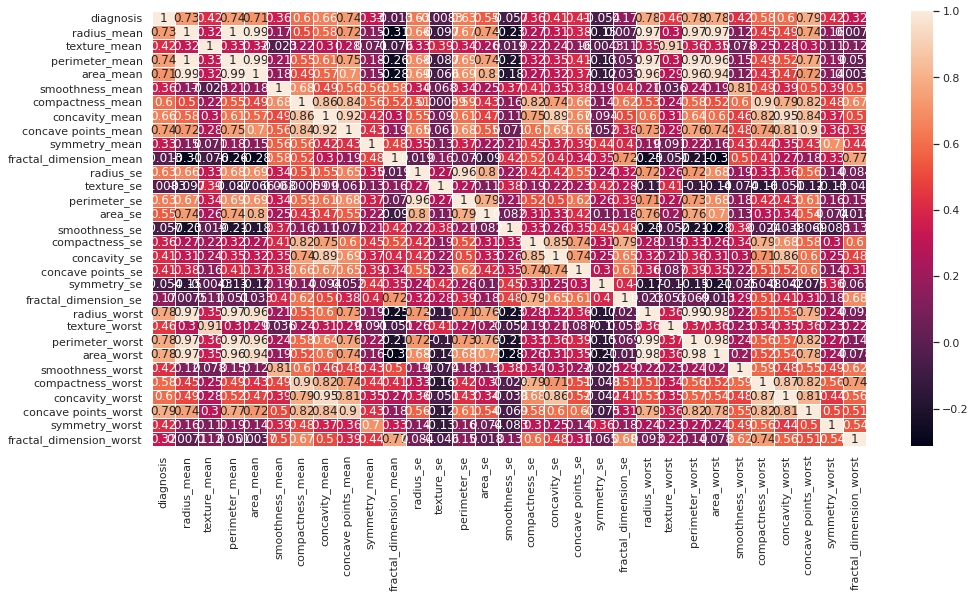

diagnosis                  1.000000
concave points_worst       0.793566
area_worst                 0.784062
perimeter_worst            0.782914
radius_worst               0.776454
perimeter_mean             0.742636
concave points_mean        0.736333
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.655020
perimeter_se               0.634414
radius_se                  0.628407
concavity_worst            0.596354
compactness_mean           0.596313
compactness_worst          0.583762
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concavity_se               0.408721
concave points_se          0.408042
compactness_se             0.364820
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
fractal_dimension_se       0.166057
id                         0

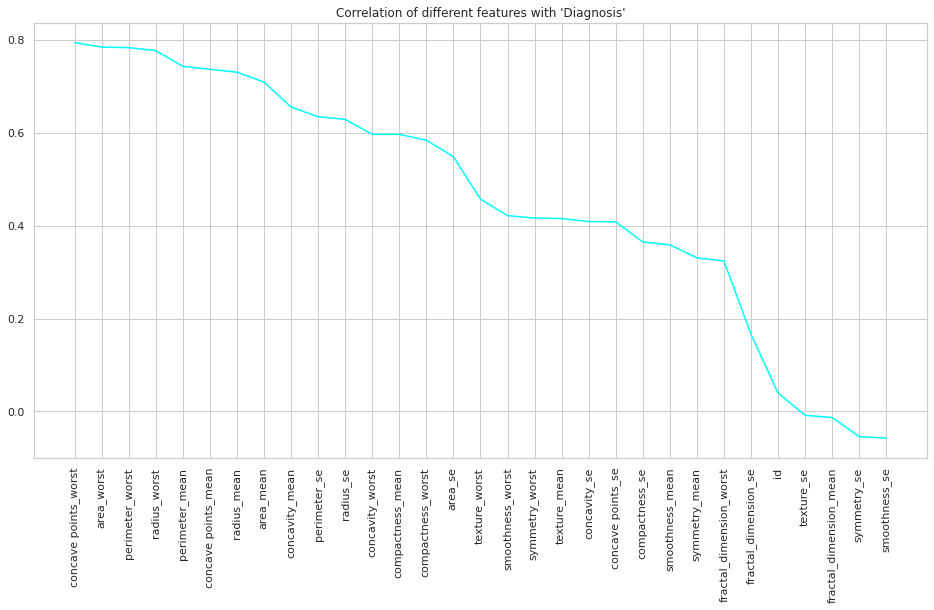

In [10]:
plt.figure(figsize=(16,8))
corr=data1.drop(["id"],axis=1).corr()
sns.heatmap(corr,annot=True,linewidth=1)
plt.show()

#Correaltion of features in descending order
print(data1.corr()['diagnosis'].sort_values(ascending=False))

plt.figure(figsize=(16,8))
plt.plot(data1.corr()['diagnosis'].sort_values(ascending=False)[1:],color="cyan")
plt.title("Correlation of different features with 'Diagnosis'")
plt.xticks(rotation=90)
plt.show()

In [11]:
data_M = data1[data1.diagnosis==1]     #Minority
data_B = data1[data1.diagnosis==0]     #Majority

data_M_upsampled=resample(data_M,replace=True, n_samples=300, random_state=12)
data_B_downsampled= data_B.sample(n=300).reset_index(drop=True)

#New dataset for balanced data
Balanced_df = pd.concat([data_M_upsampled, data_B_downsampled]).reset_index(drop=True)

1    300
0    300
Name: diagnosis, dtype: int64


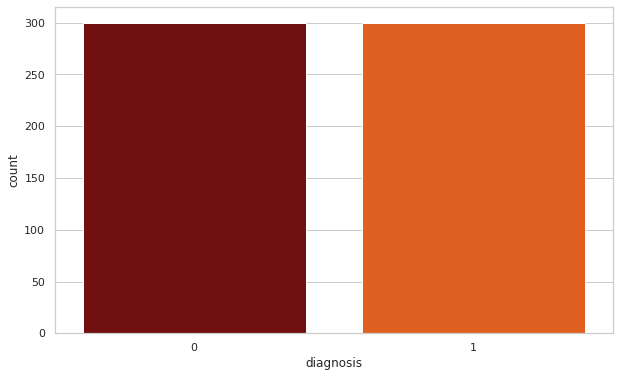

In [12]:
print(Balanced_df["diagnosis"].value_counts())
plt.figure(figsize=(10,6))
sns.countplot(x='diagnosis', data=Balanced_df, palette='gist_heat')
plt.show()

**Now the count for our output variable "diagnosis" has been made equal**

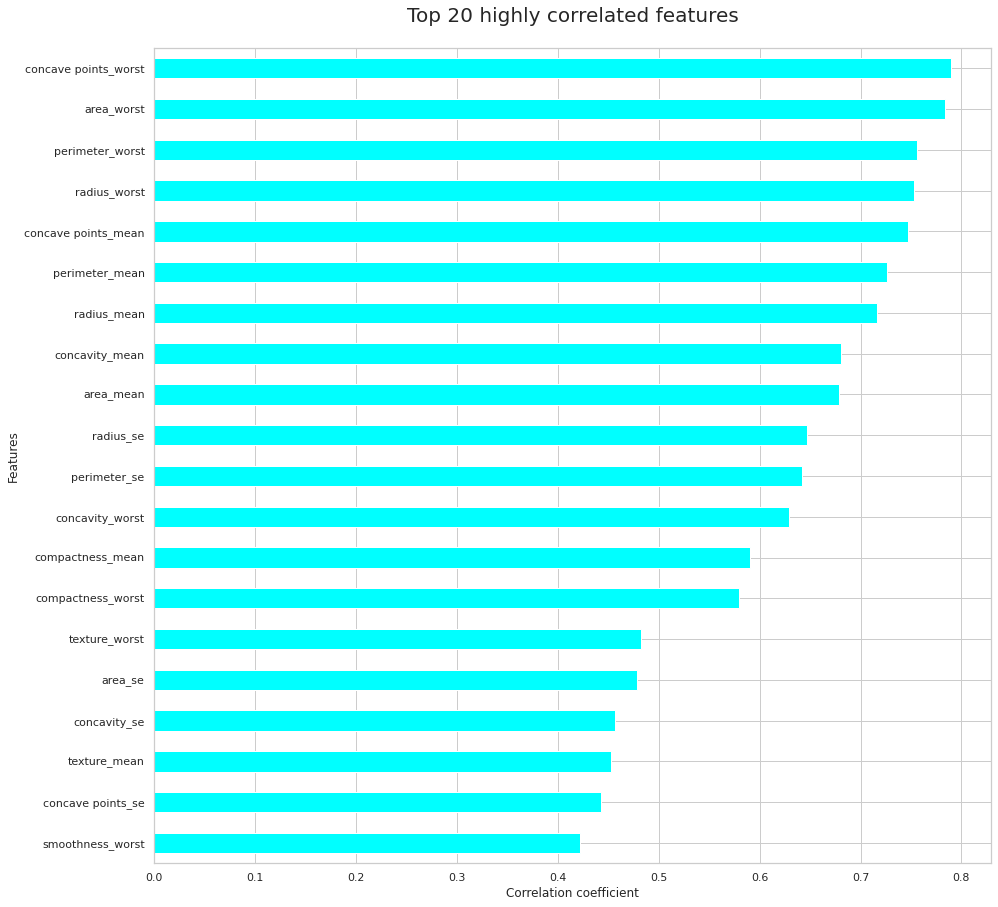

In [13]:
plt.figure(figsize=(15,15))
Balanced_df.corr().diagnosis.apply(lambda x: abs(x)).sort_values(ascending=False).iloc[1:21][::-1].plot(kind='barh',color='cyan') 
# calculating the top 20 highest correlated features
# with respect to the target variable i.e. "quality"
plt.title("Top 20 highly correlated features", size=20, pad=26)
plt.xlabel("Correlation coefficient")
plt.ylabel("Features")
plt.show()

We will only be using the top 20 correlated features to train our model, this will hellp improve the accuacy. 

In [14]:
selected_features=Balanced_df.corr().diagnosis.sort_values(ascending=False).iloc[1:21][::-1].index

X = Balanced_df[selected_features]
Y = Balanced_df.diagnosis

**Split data into training and testing sets**

In [15]:
X=data.iloc[:,2:32]
Y=data.iloc[:,1]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0) 

#Feature Scaling
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

# Model 1=>Logistic Regression

In [16]:
LR_model=LogisticRegression(random_state=0)
LR_model.fit(X_train,Y_train)

LogisticRegression(random_state=0)

In [17]:
Y_pred=LR_model.predict(X_test)

Precision: 0.957 
Recall: 0.936 
F1-Score: 0.946 
Accuracy: 95.61% 



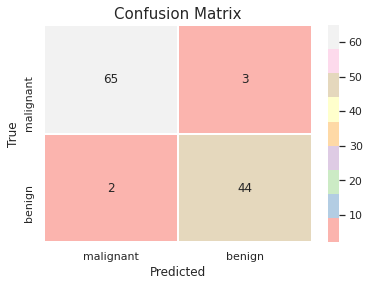

In [18]:
cm=confusion_matrix(Y_pred,Y_test)
class_label = ["malignant", "benign"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)

precision, recall, fscore, train_support = score(Y_test, Y_pred, pos_label="M", average='binary')
Logistic_Regression_accuracy=round(acs(Y_test,Y_pred), 4)*100
print('Precision: {} \nRecall: {} \nF1-Score: {} \nAccuracy: {}'.format(
    round(precision, 3), round(recall, 3), round(fscore,3), Logistic_Regression_accuracy) +"% \n")

sns.heatmap(df_cm,annot=True,cmap='Pastel1',linewidths=2,fmt='d')
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Model 2=>Support Vector Machine

In [19]:
svm=SVC(kernel="rbf",random_state=0)
svm.fit(X_train,Y_train)

SVC(random_state=0)

In [20]:
Y_pred=svm.predict(X_test)

Precision: 1.0 
Recall: 0.957 
F1-Score: 0.978 
Accuracy: 98.25% 



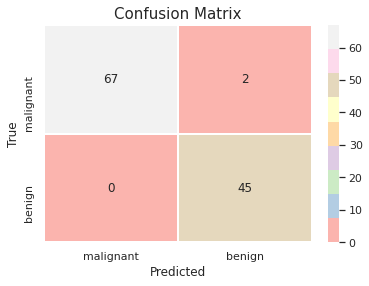

In [21]:
cm=confusion_matrix(Y_pred,Y_test)
class_label = ["malignant", "benign"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)

precision, recall, fscore, train_support = score(Y_test, Y_pred, pos_label="M", average='binary')
SVM_accuracy=round(acs(Y_test,Y_pred), 4)*100
print('Precision: {} \nRecall: {} \nF1-Score: {} \nAccuracy: {}'.format(
    round(precision, 3), round(recall, 3), round(fscore,3), SVM_accuracy) +"% \n")

sns.heatmap(df_cm,annot=True,cmap='Pastel1',linewidths=2,fmt='d')
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Model 3=>Decision Tree

In [22]:
tree=DecisionTreeClassifier(random_state=10)
tree.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=10)

In [23]:
Y_pred=tree.predict(X_test)

Precision: 0.917 
Recall: 0.936 
F1-Score: 0.926 
Accuracy: 93.86% 



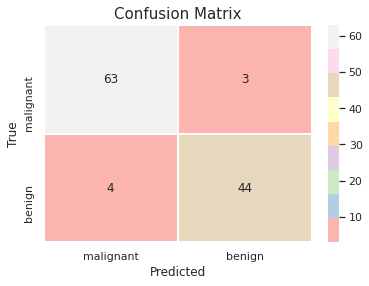

In [24]:
cm=confusion_matrix(Y_pred,Y_test)
class_label = ["malignant", "benign"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)

precision, recall, fscore, train_support = score(Y_test, Y_pred, pos_label="M", average='binary')
Decision_Tree_accuracy=round(acs(Y_test,Y_pred), 4)*100
print('Precision: {} \nRecall: {} \nF1-Score: {} \nAccuracy: {}'.format(
    round(precision, 3), round(recall, 3), round(fscore,3), Decision_Tree_accuracy) +"% \n")

sns.heatmap(df_cm,annot=True,cmap='Pastel1',linewidths=2,fmt='d')
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Model 4=>K-Nearest Neighbor (KNN) classification

In [25]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [26]:
Y_pred=knn.predict(X_test)

Precision: 1.0 
Recall: 0.915 
F1-Score: 0.956 
Accuracy: 96.49% 



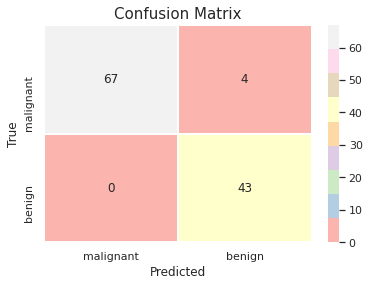

In [27]:
cm=confusion_matrix(Y_pred,Y_test)
class_label = ["malignant", "benign"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)

precision, recall, fscore, train_support = score(Y_test, Y_pred, pos_label="M", average='binary')
KNN_accuracy=round(acs(Y_test,Y_pred), 4)*100
print('Precision: {} \nRecall: {} \nF1-Score: {} \nAccuracy: {}'.format(
    round(precision, 3), round(recall, 3), round(fscore,3), KNN_accuracy) +"% \n")

sns.heatmap(df_cm,annot=True,cmap='Pastel1',linewidths=2,fmt='d')
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

**Method to find the best value of *n_neighbors* based on accuracy**

In [28]:
val=10   #Max value of n_neighbor
model=knn  #Name of model you want to train (I'm training my KNN model)
for K in range(val):
    K_value = K+1
    model = KNeighborsClassifier(n_neighbors=K_value)
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    print("Accuracy is : ", acs(Y_test,Y_pred)*100,"% for n_neighbors: ", K_value)

Accuracy is :  92.98245614035088 % for n_neighbors:  1
Accuracy is :  93.85964912280701 % for n_neighbors:  2
Accuracy is :  96.49122807017544 % for n_neighbors:  3
Accuracy is :  94.73684210526315 % for n_neighbors:  4
Accuracy is :  96.49122807017544 % for n_neighbors:  5
Accuracy is :  95.6140350877193 % for n_neighbors:  6
Accuracy is :  95.6140350877193 % for n_neighbors:  7
Accuracy is :  95.6140350877193 % for n_neighbors:  8
Accuracy is :  94.73684210526315 % for n_neighbors:  9
Accuracy is :  95.6140350877193 % for n_neighbors:  10


# Logloss

In [29]:
# Model 1=>Logistic Regression
LR_model = LogisticRegression(random_state=0)
LR_model.fit(X_train, Y_train)
LR_probs = LR_model.predict_proba(X_test)
score = log_loss(Y_test, LR_probs)
print(score)

0.09224742168482057


In [30]:
# Model 2=>Support Vector Machine
SVC_model = SVC(kernel="rbf",random_state=0)
SVC_model.fit(X_train, Y_train)
SVC_probs = SVC_model.decision_function(X_test)
score = log_loss(Y_test, SVC_probs)
print(score)

0.6991431720470885


In [31]:
# Model 3=>Decision Tree
tree_model = DecisionTreeClassifier(random_state=10)
tree_model.fit(X_train, Y_train)
tree_probs = tree_model.predict_proba(X_test)
score = log_loss(Y_test, tree_probs)
print(score)

2.1208020593366212


In [32]:
# Model 4=>K-Nearest Neighbor (KNN) classification
KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train, Y_train)
KNN_probs = KNN_model.predict_proba(X_test)
score = log_loss(Y_test, KNN_probs)
print(score)

0.3912187795334521


# Jaccard Index

In [33]:
from sklearn.metrics import jaccard_score

In [34]:
# Model 1=>Logistic Regression
LR_model = LogisticRegression(random_state=0)
LR_model.fit(X_train, Y_train)
LR_probs = LR_model.predict_proba(X_test)
score = jaccard_score(Y_test, Y_pred, pos_label="M", average='binary')
print(score)

0.8936170212765957


In [35]:
# Model 2=>Support Vector Machine
SVC_model = SVC(kernel="rbf",random_state=0)
SVC_model.fit(X_train, Y_train)
SVC_probs = SVC_model.decision_function(X_test)
score = jaccard_score(Y_test, Y_pred, pos_label="M", average='binary')
print(score)

0.8936170212765957


In [36]:
# Model 3=>Decision Tree
tree_model = DecisionTreeClassifier(random_state=10)
tree_model.fit(X_train, Y_train)
tree_probs = tree_model.predict_proba(X_test)
score = jaccard_score(Y_test, Y_pred, pos_label="M", average='binary')
print(score)

0.8936170212765957


In [37]:
# Model 4=>K-Nearest Neighbor (KNN) classification
KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train, Y_train)
KNN_probs = KNN_model.predict_proba(X_test)
score = jaccard_score(Y_test, Y_pred, pos_label="M", average='binary')
print(score)

0.8936170212765957


**Comparison of Accuracy**

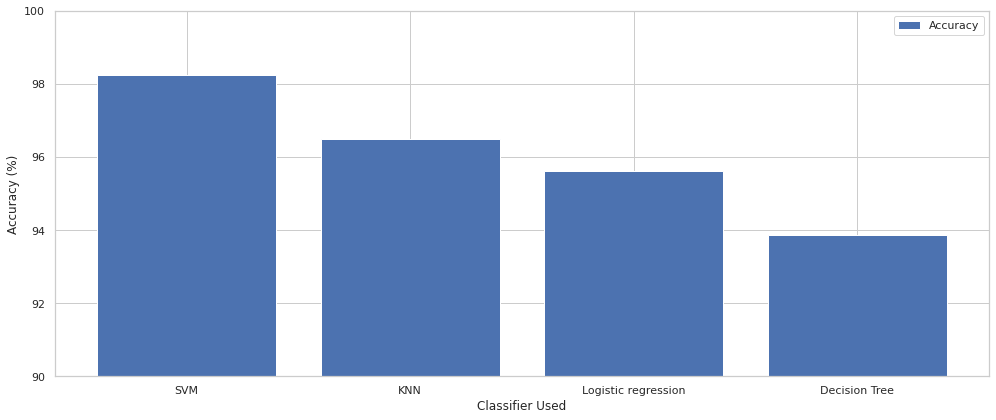

In [38]:
accuracies={"SVM": SVM_accuracy,
            "KNN": KNN_accuracy,
            "Logistic regression": Logistic_Regression_accuracy,
            "Decision Tree": Decision_Tree_accuracy}

#Plot accuracy for different models
plt.figure(figsize=(14,6))
plt.bar(accuracies.keys(),accuracies.values(),label="Accuracy")
plt.xlabel("Classifier Used")
plt.ylabel("Accuracy (%)")
plt.ylim(90,100)
plt.legend()
plt.tight_layout()
plt.show()

# Acknowledgements
* [Breast cancer classification,8 models(98.25% acc)](https://www.kaggle.com/advikmaniar/breast-cancer-classification-8-models-98-25-acc)